$\newcommand{\rads}{~rad.s$^{-1}$}$
$\newcommand{\bnabla}{\boldsymbol{\nabla}}$
$\newcommand{\eexp}[1]{\text{e}^{#1}}$
$\newcommand{\glm}[1]{\overline{#1}^L}$
$\newcommand{\di}[0]{\textrm{d}}$
$\newcommand{\bs}[1]{\boldsymbol{#1}}$
$\newcommand{\ode}[2]{\frac{\di {#1}}{\di {#2}}}$
$\newcommand{\oden}[3]{\frac{\di^{#1} {#2}}{\di {#3}^{#1}}}$
$\newcommand{\odel}[2]{\di {#1}/\di {#2}}$
$\newcommand{\odeln}[3]{\di^{#1} {#2}/\di {#3}^{#1}}$
$\newcommand{\pde}[2]{\frac{\partial {#1}}{\partial {#2}}}$
$\newcommand{\pden}[3]{\frac{\partial^{#1} {#2}}{\partial {#3}^{#1}}}$
$\newcommand{\pdel}[2]{\partial_{#2} {#1}}$
$\newcommand{\pdenl}[3]{\partial^{#1}_{#3} {#2}}$
$\newcommand{\mde}[1]{\frac{\textrm{D} {#1}}{\textrm{D} t}}$
$\newcommand{\mdel}[1]{\textrm{D}_t {#1}}$
$\newcommand{\divr}[1]{\vec\nabla \cdot {#1}}$
$\newcommand{\divrb}[1]{\boldsymbol{\nabla} \cdot {#1}}$
$\newcommand{\grad}[1]{\vec \nabla {#1}}$
$\newcommand{\gradb}[1]{\boldsymbol\nabla {#1}}$
$\newcommand{\curl}[1]{\vec\nabla \times {#1}}$
$\newcommand{\curlb}[1]{\boldsymbol{\nabla}\times\boldsymbol{#1}}$
$\newcommand{\lapl}[0]{\vec\nabla^2}$
$\newcommand{\laplb}[0]{\boldsymbol{\nabla}^2}$
$\newcommand{\cplxi}[0]{\mathrm i}$
$\newcommand{\unit}[1]{\mathbf{\hat{#1}}}$
$\newcommand{\thrfor}[0]{\quad\Rightarrow\quad}$
$\newcommand{\red}[1]{\textcolor{red}{#1}}$
$\newcommand{\blue}[1]{\textcolor{blue}{#1}}$
$\newcommand{\mage}[1]{\textcolor{magenta}{#1}}$

In [3]:
from IPython.display import Image, display, YouTubeVideo

*[King § 2]*

In the previous chapter, we introduced the importance of second-order ODEs in the description of simple oscillators. 
But our oscillations went on forever, which of course is not realistic: the mass attached to the spring eventually comes to rest, and electrical oscillations eventually come to a stop because there is always some electric resistance in any circuit.

This is because almost every physical system contains dissipative processes, which slowly leak energy out to the wider world (often in the form of heat).
Fortunately for us, many of these processes are proportional to the velocity (or its equivalent).
This has the advantage of being mathematically relatively simple, and that they do not change the second-order nature of the ODE we need to solve.

Again, the physics of how the dissipation processes are measured is contained in the additional coefficient. It is usually very hard to predict theoretically, and often can only be measured.
In the context of this class again, we do not worry about the physics: we assume that we know the coefficients, and solve the behaviour of the system based on it.

# Expectations

## Remember:

* the generic form of the DHO, $\ddot x + \gamma \dot x + \omega_0^2x = 0$,
* the definitions of $\omega_0^2$ and $\gamma$ for the mass-spring system, and what they represent physically (oscillations and damping),
* the three regimes, and how $\omega_0^2 - \gamma^2/4$ determines the regime.
* for a lightly-damped oscillator, the expression of the (pseudo-)period of oscillation, i.e., $\omega_d^2 = \omega_0^2 - \gamma^2/4$,
* the general shape of the oscillations for underdamped, overdamped and critically damped oscillators, and the various features that are present on it (envelope, pseudo-period, logarithmic decrement),
* that the mechanical energy in an underdamped oscillator decays exponentially, with e-folding time scale $1/\gamma$,
* that the critically-damped oscillator is the one for which the decay is the quickest,
* the definition of the quality factor $Q = \omega_0/\gamma$, and
* that $Q$ is a measure of how many times an underdamped oscillator oscillates before dying, or of the relative energy loss per radian of oscillation.

## Understand:

* the three terms entering Newton's 2nd law for a damped oscillator, and how to cast it in the generic form $\ddot x + \gamma \dot x + \omega_0^2x = 0$,
* how the three cases of oscillators are derived, and the connection between complex exponentials and oscillations vs. real exponentials and exponential decay (*understand* it, don't *re-derive* it),
* that damping removes energy from the system,
* how the expressions for the evolution of the various energies are derived, and
* that all damped linear harmonic oscillators behave the same way.

## Apply

See worked examples, tutorials and problem sets.

# Let's warm up

The mass+spring system of the previous chapter was not very dissipative. But had I waited 20 minutes or so, we would have seen the mass gradually come to rest. This is the sign of a "high-Q" oscillator, a notion you should be familiar with by the end of this chapter.

To lower the Q-factor and see the mass come to rest due to friction within a reasonable amount of time, we can simply increase the friction by plunging a similar mass in water. 
This is the video below (Jupyter) or at https://youtu.be/LxMMEMv5fhg.

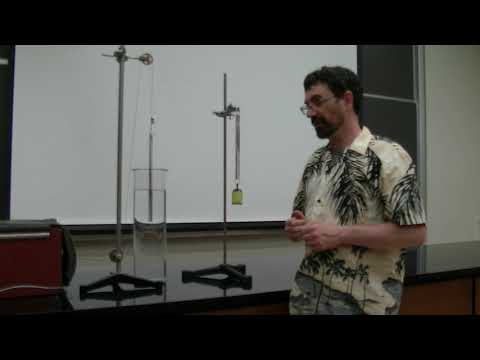

In [4]:
YouTubeVideo('LxMMEMv5fhg', width=800, height=300)

Before I dig into the math, you should watch the following video of the two things that can happen when oscillators are damped (that is, a lot of damping and a little damping), and how the situation that is in-between, i.e., neither very damped nor weakly damped, is worth consideration by itself (it is the one that stops first).
I will quantify all of my statements later, but before I do, watch the video so that you at least know what I want to get at.

For those of you who only use the pdf, the video is on YouTube:
https://www.youtube.com/embed/99ZE2RGwqSM

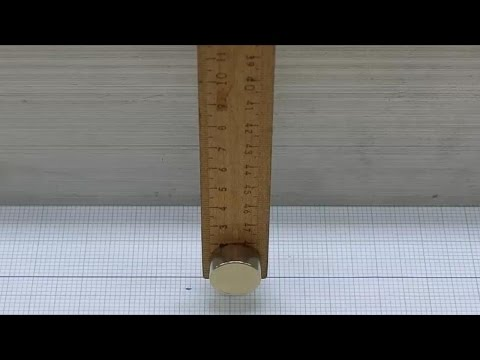

In [5]:
YouTubeVideo('99ZE2RGwqSM', width=800, height=300)

## Equations of Motion

Back to our favourite oscillator (fig. 1): the spring-mass system.

![Fig. 1: Spring-mass system, again](SpringMass.png)

Now, on top of the force of the spring on the mass, we assume a more realistic case in which the mass is feeling some friction proportional to its velocity:
$$ F_d = -bv = -b\dot x, $$
where the subscript $d$ stands for "damping", and $b$ is in kg.s$^{-1}$.
The negative sign indicates that the force acts on the direction, opposite to that of the motion, and the proportionality is the simplest mathematical form one could think of.

*Note: this is a linear approximation again.*
*For example, for a car on a highway (therefore not oscillating, but the force would have the same expression), the frictional force would be proportional to $v^2$.*
*This would be a lot more difficult to handle, mathematically speaking.*
*And again, this approximation is sufficient to describe a lot of physical systems.*

The new equation of motion (EOM) is $m \ddot x = -kx - b \dot x$, or, dividing by $m$, 
$$\boxed{\ddot x + \gamma \dot x + \omega_0^2 x = 0},\quad\textrm{with } \gamma = b/m,\ \omega_0^2 = k/m.\qquad (1)$$
* $\gamma$ is often called the *damping factor*, in s$^{-1}$.
* The angular frequency $\omega_0$ is now called the *natural (angular) frequency* of the oscillator, i.e., the frequency of the system if there was no damping. This is a hint that there could be more than one frequency.

## General Solutions

The equation above is still a homogeneous second-order ODE: the general form of the solution will still be the same, and there will be two coefficients to solve for, for which we will need two initial conditions.

The form of the solution is slightly more complicated for the DHO than for the SHO, but we will see that there is a way to make the connection.
For now, let us just *try* a solution: 
$$x = a\exp(rt),\quad \textrm{with } (a, r) \in \mathbb C^2.$$
"$r$" stands for *root*: we are looking for the root(s) of the ODE.

Why should $r\in\mathbb C$?
You will see it in your ODE class, if you haven't already.
As an indication, recall that for $\theta \in \mathbb R$,
$$\exp(i\theta) = \cos\theta + i\sin\theta.$$
So, if you split the root into its real and imaginary parts, i.e., $rt = r_r t + i\theta t$ with $(r_r, \theta) \in \mathbb R^2$, then 
$$\exp(r t) = \left[\cos(\theta t) + i \sin(\theta t)\right]\exp(r_r t).$$
Hopefully, we are starting to see a connection: the real or imaginary part of $\exp(r)$ is an oscillation, multiplying an exponential decay in the case of $r_r < 0$ (exponential growth for $r_r>0$, but why would friction cause more motion?).

We don't know yet if this is the right solution, but let's just say that it could work.

Because we want to plug in the trial solution $a\exp(rt)$ into equation (1), we need the derivatives:
$$ \dot x(t) = ar\exp(rt) = rx(t) \quad\textrm{and}\quad \ddot x = ar^2\exp(rt) = r^2x(t). $$

We can now plug in:
$$ \ddot x + \gamma \dot x + \omega_0^2 x = r^2 x(t) + \gamma r x(t) + \omega_0^2 x(t) =  0$$
Because we know that $x(t)$ it is not zero except at specific instants, and that we need a solution that works at every instant, we need the factor of $x(t)$ to be zero, i.e.,
$$r^2 + \gamma r + \omega_0^2 = 0$$

The equation is a good ol' second-order polynomial, which is solved in the same way, whether the variable is real or complex. 
Starting with its discriminant, which is 
$$\Delta = \gamma^2 - 4\omega_0^2.$$
This quantity will be important later.

The roots are therefore
$$r_p = -\frac\gamma2 + \sqrt{\frac{\gamma^2}4 -\omega_0^2}\quad \textrm{and}\quad r_m = -\frac\gamma2 - \sqrt{\frac{\gamma^2}4 -\omega_0^2}.\qquad (2)$$
There are two possible roots, and because the ODE is linear, any linear combination of them is also a solution of the original equation (*check if you are not sure!*).
The most general solution is therefore
$$x(t) = a_p\exp(r_p t) + a_m\exp(r_mt).\qquad (3)$$


But careful, the above expression does not work when $\omega^2 = \gamma^2/4$, are we are about to see!

# Damping: Weak or Strong?

## Preliminary Considerations

Looking at equation (2) in detail, we realize that there are three cases to consider:

1. if $\gamma^2/4 < \omega_0^2$ ($\Delta < 0$), then inside the square root is negative, the square root is purely imaginary, and $r_{p,m}$ have a real and an imaginary part. As we are about to see, solutions oscillate, on top of decaying exponentially. This case is called "underdamped", or "light damping", because the dissipation ($\gamma$) is small enough that oscillations ($\omega_0$) can happen.

2. if $\gamma^2/4 > \omega_0^2$ ($\Delta >0$), then inside the square root is positive, the square root is real, and both $r_{p,m}$ are real. The solutions are decaying exponentially. This case is called "overdamped" or "heavy damping", because the dissipation ($\gamma$) is so strong that the oscillation ($\omega_0$) cannot happen even once.

3. if $\gamma^2/4 = \omega_0^2$ ($\Delta = 0$), $r_p = r_m = -\gamma/2$. The solution I wrote at the end of the previous section is not even valid anymore, the actual solution being $x(t) = (A + B t)\exp(-\gamma t/2)$, with $A$ and $B$ TBD. This case is called "critical damping"

Let us investigate these three cases in more detail.

## Light Damping ($\omega_0^2 > \gamma^2/4$)

### Solution

Let $$ \omega_d^2 = \omega_0^2 - \frac{\gamma^2}4 >0 \quad\textrm{and}\quad T_d = \frac{2\pi}{\omega_d}. $$
Therefore, $$r_{p, m} = -\frac\gamma2 \pm \cplxi\omega_d,\quad \textrm{and} $$
$$ x(t) = \exp\left(- \frac{\gamma t}2\right)\left(a_p\eexp{\cplxi\omega_d t} + a_m\eexp{-\cplxi\omega_d t}\right),$$
with $(a_p, a_m) \in \mathbb C^2$.

At this point, the problem is more complicated than with the SHO, because we have four unknown (the real and imaginary parts of $a_p$ and $a_m$).
But we should also have four pieces of information: the initial position, the initial velocity, and --- and this is going to be weird --- *the knowledge that $x\in \mathbb R$*, and *the knowledge that $v\in \mathbb R$*. 

These last two pieces of information help, not so much in *computing two out of four unknown*, but rather in knowing that *you only need to compute two unknown*.
Indeed, recall that $\exp(i\theta) = \cos\theta + i\sin\theta$, as well as the existence of trigonometric identities such as $\cos(a+b) = \cos a \cos b - \sin a \sin b$ (you only need to know that they exist).
Using a polar decomposition for $a_p = |a_p|\exp(i\phi_p)$ and same for $a_m$, and using all these identities I just recalled, it is relatively easy to imagine that the position $x(t)$ could be re-written in the form of
$$ x(t) = \exp\left(- \frac{\gamma t}2\right)\left(A\cos(\omega_d t + \phi) + i A'\cos(\omega_d t + \phi')\right), $$
with $A$, $\phi$, $A'$ and $\phi'$ being real numbers, and also horrible combinations of $|a_p|$, $\phi_p$, etc.
But then, if we know that $x\in \mathbb R$, then $A' = 0$, and $\phi'$ becomes irrelevant.
Note that we could do the same thing with $v$.

So, we now know that those complex exponentials are unnecessarily complicated, which in fact, what we really need is to solve for
$$ x(t) = A_0\eexp{- \gamma t/2}\cos(\omega_d t +\phi).$$

***

*Note: Here are longer explanations, but before I mention them, let me reassure you: I went quicky over it during the lecture, not because it is so obvious that I don't need to spend some (virtual) chalk on it, but because you shouldn't worry about what is essentially a detail.*

First explanation is in the ending of this video (I adjusted the time already) https://youtu.be/5sL6EesIZ7Q?t=220.

What follows is another explanation of the same thing, perhaps with more detail, if that itch is not scratched.

So, let us see how we would do if we were to solve the problem with initial conditions.
We would need to define $a_p = |a_p|\eexp{i\phi_p}$ and $a_m = |a_m|\eexp{i\phi_m}$.
So far we have
$$a_p\eexp{\cplxi\omega_d t} + a_m\eexp{-\cplxi\omega_d t} = |a_p|\eexp{\cplxi(\omega_d t +\phi_p)} + |a_m|\eexp{\cplxi(\phi_m - \omega_d t)}$$

Then, remember that $\eexp{i\theta} = \cos\theta + \cplxi\sin\theta$.
The real part of the expression above is therefore
$$ |a_p|\cos(\omega_d t +\phi_p) + |a_m|\cos(\omega_d t - \phi_m), $$
and its imaginary part is
$$ |a_p|\sin(\omega_d t +\phi_p) - |a_m|\sin(\omega_d t - \phi_m). $$

What a mess, and this is just for the position $x(t)$: it needs to be done again for the velocity $v(t)$.

We now have four unknown ($|a_p|, |a_m|, \phi_p, \phi_m$), and four equations:
$$\textrm{Re}[x(t=0)] = x_0 = \textrm{Re}(a_p + a_m) = |a_p|\cos\phi_p + |a_m|\cos\phi_m, $$
$$\textrm{Im}[x(t=0)] = 0 = \textrm{Im}(a_p + a_m) = |a_p|\sin\phi_p - |a_m|\sin\phi_m, $$
$$\textrm{Re}[v(t=0)] = v_0 = \textrm{Re}(r_p a_p + r_m a_m) = \textrm{something that looks like what is above}, $$
$$\textrm{Im}[v(t=0)] = 0 = \textrm{Im}(r_p a_p + r_m a_m) = \textrm{more of the same but different}. $$

We kept complex numbers around, adding two unknowns, and in response, we had to add two equations to make sure that the imaginary parts would be zero.

And then, assuming that we managed to solve the system, what would the real parts looks like? A bunch of sines and cosines with phases in them, which we would expand using the formulae $\cos(a+b) = \cos a\cos b - \sin a \sin b$ and  $\sin(a+b) = \sin a\cos b + \cos a \sin b$. 
The next step would be to regroup all the $\sin(\omega_dt)$ together, the $\cos(\omega_d t)$ together, and we would find an expression of the type
$$ x_0 = A_1 \cos(\omega_dt) + A_2 \sin(\omega_d t), $$
where $A_1$ and $A_2$ would be very long expressions of $|a_p|$, $|a_m|$, $\phi_p$ and $\phi_m$. 
And finally, the expression above can also be written as $A\cos(\omega_d t + \phi)$.

The point that I want to make is that a lot of the damage was self-inflicted: it was completely predictable, based on these considerations, that the solution was going to take the form $A\cos(\omega_dt + \phi)$, and that the imaginary parts were going to disappear because the solutions had to be real.

Perhaps one last objection you could raise is that King's book starts directly with $A \cos(\omega t + \phi)$. 
Why not do the same?
That is because:

1. at some point, I would need to compute $v(t) = \dot x(t)$, which turns out to be a little complicated if sines and cosines are used;
2. this approach allows for a similar treatment between the underdamped and overdamped cases (King has to re-boot his derivation, and you lose the connection between real and complex exponentials),
3. eventually, you should be comfortable with the notion of switching between real and complex exponentials.

*Let me re-iterate though: whether you are now convinced or not, you will not be tested on such technical points.
It will make you a better engineer and scientist if you understand it, and it will make your life easier in the classes that come after this one, but you will not loose points if you don't.*

Back to our regular business.

***

The velocity is $$ v(t) = \dot x(t) = A_0\eexp{- \gamma t/2}\left[-\omega_d\sin(\omega_d t + \phi) - \frac{\gamma}{2}\cos(\omega_dt +\phi)\right].$$

Like in the previous chapter, we have two coefficients to solve for, and we need two initial conditions to solve it.

***

The specific derivation of $A_0$ and $\phi$ that follows doesn't really matter, and I didn't cover it in class, but I need it for plotting purposes (fig. 2).
Using the initial conditions I used before:

* $x(t=0) = x_0 = A_0\cos\phi$, and
* $v(t=0) = 0 = -A_0\left[\omega_d\sin\phi + \frac{\gamma}{2}\cos\phi\right]\ \Rightarrow\ \tan\phi = -\frac\gamma{2\omega_d}$.

On the $[0, 2\pi]$ circle, $\phi$ is the angle for which $\cos\phi$ and $x_0$ have the same sign, because $A_0>0$ by definition.

***

In [6]:
# let's plot
# This cell is for parameters that I do not intend to change across this chapter.
from numpy import cos, sin, exp, sqrt, linspace, pi, sign, arctan
import matplotlib.pyplot as plt
from matplotlib import interactive
interactive(False)

x0 = 4e-2  # initial position [m]
v0 = 0.  # initial velocity [m/s]
k = 180.  # spring stiffness [N/m]
m = 0.8  # mass [kg]
b_under = 1.  # damping parameter [kg/s]
b_over = 1.5*2*sqrt(k*m)  # [kg/s]; this makes sure that the discriminant is >0

In [7]:
def plot_LDHO(k, m, b, x0):
    """ Function that computes and plots the position
    INPUT:
    k: spring stiffness [N/m, kg/(s**2)]
    m: mass [kg]
    b: damping  parameter [N*s/m, kg/s]
    x0: initial position [m]
    OUTPUT: plot of the energies"""
    
    if b >= 2*sqrt(k*m):
        raise ValueError('plot_LDHO only works for underdamped oscillators')
    
    t_end = 3.  # [s] final time for plot
    
    omega_0 = sqrt(k/m)  # natural frequency of the oscillation [rad/s]
    t = linspace(0., t_end, 1024)  # time array, from 0 to 0.6 s, 1024 points

    ftsz = 13  # font size on plots

    # derived quantities
    gamma = b/m  #  damping coefficient [1/s]
    omega_d = sqrt(omega_0**2 - gamma**2/4)
    phi = arctan(-0.5*gamma/omega_d)
    if sign(cos(arctan(phi))) == -sign(x0):  # make sure the correct phase is chosen
        phi += pi  # if not, augment phi by pi to find the other phase
    A0 = x0/cos(phi)

    T_d = 2*pi/omega_d  # period of oscillation [s]    

    x = A0*exp(-0.5*gamma*t)*cos(omega_d*t + phi)  # position [m]
    envelope = A0*exp(-0.5*gamma*t)
    v = A0*exp(-0.5*b_under/m*t)*(-omega_d*sin(omega_d*t + phi)
                                        - 0.5*b_under/m*cos(omega_d*t + phi))
    v_approx = -A0*exp(-0.5*b_under/m*t)*omega_0*sin(omega_d*t + phi)

    fig = plt.figure(dpi=100)
    ax1 = fig.gca()
    ax1.plot(t, x, 'b', label='$x(t)$')  # plotting the position x
    ax1.plot(t, envelope, 'r--', label='$A_0e^{-\gamma t/2}$')  # plotting the envelope
    ax1.plot(t, -envelope, 'r-.', label='$-A_0e^{-\gamma t/2}$')
    ax1.set_xlabel('time [s]', fontsize=ftsz) 
    ax1.set_ylabel(r'position $x$ [m]', fontsize=ftsz)

    # annotation to highlight the period
    for nn in range(3, 5):
        ax1.axvline(nn*T_d, color='k', linestyle='-.')  # the t=nT mark
    ax1.annotate(s='', xy=(3*T_d, 3.5e-2), xytext=(4*T_d, 3.5e-2),
                 arrowprops=dict(arrowstyle='<|-|>'))  # the double arrow
    ax1.text(3.5*T_d, 4.4e-2, r'$T_d = 2\pi/\omega_d$',
             verticalalignment='center', horizontalalignment='center',
             backgroundcolor='w', fontsize=ftsz)

    # annotations to highlight the logarithmic decay
    ax1.annotate(s='', xy=(3*T_d, 0.), xytext=(3*T_d, A0*exp(-0.5*gamma*3*T_d)),
                 arrowprops=dict(arrowstyle='<|-'))  # the double arrow
    ax1.text(3*T_d, 1.1*A0*exp(-0.5*gamma*3*T_d), '$A_n$',
             verticalalignment='bottom', horizontalalignment='left', fontsize=ftsz)

    ax1.annotate(s='', xy=(4*T_d, 0.), xytext=(4*T_d, A0*exp(-0.5*gamma*4*T_d)),
                 arrowprops=dict(arrowstyle='<|-'))  # the double arrow
    ax1.text(4*T_d, A0*exp(-0.5*gamma*4*T_d), '$A_{n+1}$',
             verticalalignment='bottom', horizontalalignment='left', fontsize=ftsz)

    ax1.grid()
    ax1.axhline(0., color='k')  # draw the zero-axis as horizontal line
    
    ax1.set_xlim(0, t_end)

    plt.legend()
    plt.show()
    
    return x, v, v_approx

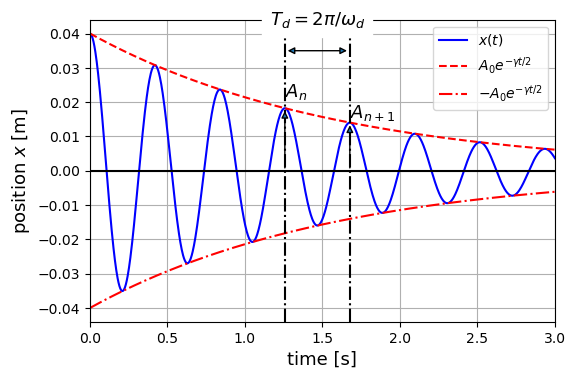

In [8]:
x_under, v_under, v_under_approx = plot_LDHO(k, m, b_under, x0)  # for pdf export

In [9]:
from ipywidgets import interact, FloatSlider, fixed

In [10]:
interact(plot_LDHO, k=FloatSlider(min=0., max=300., step=20, value=k),
         m=FloatSlider(min=0., max=2., step=0.2, value=m),
         b=FloatSlider(min=0., max=5., step=0.2, value=b_under), x0=fixed(x0))

interactive(children=(FloatSlider(value=180.0, description='k', max=300.0, step=20.0), FloatSlider(value=0.8, …

<function __main__.plot_LDHO(k, m, b, x0)>

The behaviour is that of a (co)sine oscillation of (*pseudo*-)period $T_d = 2\pi/\omega_d$ (*not* $T_0 = 2\pi/\omega_0$), like for the SHO, multiplied by an exponential envelope that makes the waves decay.

*Note: I call $T_d$ the pseudo-period, King calls it simply the period. Some of us prefer to refer to periods when systems are perfectly periodic. Here, the decay breaks the periodicity, and I prefer to talk about pseudo-periods.*

A quantity that is often used is the *logarithmic decay* or *logarithmic decrement*. 
Let $A_n = A_0\exp(-\gamma n T_d/2)$ one local maximum, and $A_{n+1} = A_0\exp(-\gamma (n+1) T_d/2)$ the next local maximum, one (pseudo-)period later (see fig. above).
Their ratio is 
$$ \frac{A_{n}}{A_{n+1}} = \exp\left(\frac{\gamma T_d}2\right)\textrm{, which does not depend on time nor }n.$$
$$ \Rightarrow \quad \ln\left(\frac{A_{n}}{A_{n+1}}\right) = \frac{\gamma T_d}2$$
The logarithmic decrement is $\gamma T_d/2$, and the tricky thing is to remember that the numerator corresponds to the preceding maximum.
I find it confusing because $A_n/A_{n+1} > 1$ or $\gamma T_d/2 > 0$, which is weird for something that decreases.
It makes sense because if a value goes down, the decrement is positive, while the increment would be negative.
It is just a matter of semantics.

### Connection with the SHO

Now, here is the connection with the SHO problem, because $\cos\theta = (\eexp{\cplxi\theta} + \eexp{-\cplxi\theta})/2$ and $\sin\theta = (\eexp{\cplxi\theta} - \eexp{-\cplxi\theta})/2$.
The "roots" of the SHO were simply $\pm\cplxi\omega t$, with $\omega_0 = \omega_d = \omega$. Therefore, it was a particular case of our current case. Indeed, $\tan\phi \propto \gamma =0 \Rightarrow \phi = 0$, implying that $A_0 = A = x_0$.

And allow me to drill this one more time: it is still a second-order ODE, for which we need two initial conditions in order to find a solution.

## Heavy damping ($\omega_0^2 < \gamma^2/4$)

A heavily damped oscillator ($\Delta = \gamma^2 - 4\omega_0^2 >0$) is not even an oscillator: it just crashes down to its initial position exponentially.
If we now define 
$$ \alpha = \frac{\sqrt{\Delta}}2 = \sqrt{\frac{\gamma^2}4  - \omega_0^2}\quad\textrm{then} \quad r_{p,m} = -\frac{\gamma}2 \pm \alpha,$$
where I used the notations of equations (2) and (3).

The general solution is now 
$$ x(t) = a_p \exp\left[\left(\alpha - \frac\gamma2\right)t\right] + a_m \exp\left[-\left(\alpha + \frac\gamma2\right)t\right]. $$
Note that these two exponentials are always decaying, even $\exp[(\alpha - \gamma/2)t]$.
Indeed, 
$$ \alpha^2 = \frac{\gamma^2}4 - \omega_0^2 < \frac{\gamma^2}4 \quad \Rightarrow \quad \alpha < \frac{\gamma} 2$$

Once again, and for every second-order ODE, we have two coefficients to solve for, and we need two initial conditions to solve it.

***

And once again, the specific derivation of $a_p$ and $a_m$ that follows doesn't really matter, and I didn't cover it in class, but I need it for plotting purposes.
Using the most general initial conditions:

* $x(t=0) = x_0 = a_p + a_m$, and
* $v(t=0) = v_0 = r_p a_p + r_m a_m$,

which is a $2\times 2$ linear system of equations (the two unknown being $a_p$ and $a_m$), we find that their solution is
$$a_p = \frac{v_0-r_mx_0}{r_p - r_m}\quad \textrm{and}\quad a_m = \frac{r_px_0 - v_0}{r_p - r_m}. $$ 

*(Do not memorize these!)*

***

Below (fig. 3), we plot for $x_0 = 4$ cm and $v_0 = 0$, just like for the other examples.

In [11]:
# let's plot
def plot_HDHO(k, m, b, x0, v0):
    # derived quantities
    gamma = b/m  #  damping coefficient [1/s]
    omega_0 = sqrt(k/m)
    t = linspace(0., 3., 1024)
    
    alpha = sqrt(0.25*gamma**2 - omega_0**2)
    r_p = alpha - 0.5*gamma
    r_m = -alpha - 0.5*gamma
    a_p = (r_m*x0 - v0)/(r_m - r_p)
    a_m = (v0 - r_p*x0)/(r_m - r_p)

    x_p = a_p*exp(r_p*t)  # the first exponential
    x_m = a_m*exp(r_m*t)  # the second exponential
    x = x_p + x_m  # position [m]
    v = r_p*x_p + r_m*x_m

    ftsz = 13
    fig = plt.figure(dpi=100)
    ax1 = fig.gca()
    ax1.plot(t, x_p, 'r--', label='$a_pe^{r_p t}$')  # plotting the 1st exponential
    ax1.plot(t, x_m, 'r-.', label='$a_me^{r_m t}$')  # plotting the 2nd exponential
    ax1.plot(t, x, 'b', label='$x(t)$')  # plotting the position x
    ax1.set_xlabel('time [s]', fontsize=ftsz) 
    ax1.set_ylabel(r'position $x$ [m]', color='b', fontsize=ftsz)
    ax1.tick_params('y', colors='b')  # color for y-axis is blue

    ax1.grid()
    ax1.axhline(0., color='k')  # draw the zero-axis as horizontal line
    ax1.set_xlim(0., 3.)

    plt.legend()
    plt.show()
    
    return x, v

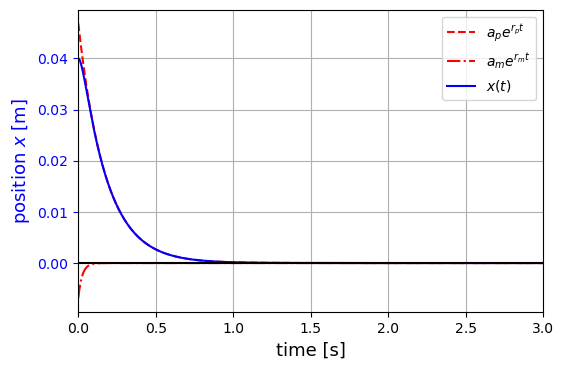

In [12]:
x_over, v_over = plot_HDHO(k, m, b_over, x0, v0)  # for pdf export

In [14]:
interact(plot_HDHO, k=FloatSlider(min=0., max=300., step=20, value=k),
         m=FloatSlider(min=0., max=2., step=0.2, value=m),
         b=FloatSlider(min=40., max=60., step=0.5, value=b_over),
         x0=FloatSlider(min=-0.1, max=0.1, step=1e-2, value=x0),
         v0=FloatSlider(min=-1., max=1., step=0.1, value=v0))

interactive(children=(FloatSlider(value=180.0, description='k', max=300.0, step=20.0), FloatSlider(value=0.8, …

<function __main__.plot_HDHO(k, m, b, x0, v0)>

So, we only have some kind of exponential decay, or more correctly, the sum of two exponential decays.
The most daring of you might try different initial conditions with the Jupyter notebook (try, e.g., $v_0 > 0$ and $x_0 = 0$), but at least, I want you to remember the general shape of the curve above.

## Critical damping ($\omega_0^2 = \gamma^2/4$)

This case can feel weird: what a coincidence it would be to have both quantities equal!
As a natural scientist, I am actually inclined to discard it, because yes, coincidences are uninteresting when they occur naturally.
But if I were an engineer, I should not ignore this case: humans build stuff, and can make this coincidence happen.
In the end of this sub-section, I will show everyday applications. 
But for now, let's dive in.

First of all, equation (3) does not work here with $a_p$ and $a_m$ being constant coefficients.
Indeed, $\omega^2_0 - \gamma^2/4 = 0$ means that $r_p = r_m = -\gamma/2$. 
In that case, equation (3) becomes 
$$ x(t) = (a_p + a_m)\exp(-\gamma t/2) $$
and if $a_p$ and $a_m$ are constant, the velocity is $v(t) = -\gamma x(t)/2$.
This is a problem: what if we have $x_0 \neq 0$ and $v_0 = 0$, like in most of our previous examples?
It is an *overprescribed* or *overconstrained* problem, in which there is more independent information than there are degrees of freedom to accommodate for it.
In short, it is impossible unless $x(t) = 0$ at all times, and then, who cares?

You might see the reason why in your ODE class, but for now, let's just accept the fact that in this very particular case, the general solution is:
$$ x(t) = (A + Bt)\exp(-\gamma t / 2).$$
You do want to check for yourself that the solution above is a solution.
It has two degrees of freedom, and a good math course would tell you that the space of solutions to a 2nd-order ODE is two-dimensional.
Therefore, if this is **one** solution, it is **the** solution, by virtue of the existence-and-uniqueness of the solutions.

The velocity is
$$v(t) = (B - \gamma A/2 - \gamma Bt/2)\exp(-\gamma t / 2). $$
with $A$ and $B$ TBD.
Two initial conditions, two unknowns: yay!

![GoT wisdom](itisKnown.gif)

***

And for the last time, I need what follows for plotting purposes.
Using the most general initial conditions:

* $x(t=0) = x_0 = A$, and
* $v(t=0) = v_0 = B - \gamma A/2 = B - \gamma x_0/2 \quad\Rightarrow \quad B = v_0 + \gamma x_0/2$.

*(Do not learn this!)*

***

Below (fig. 4), we plot for $x_0 = 4$ cm and $v_0 = 0$, just like for the other examples.

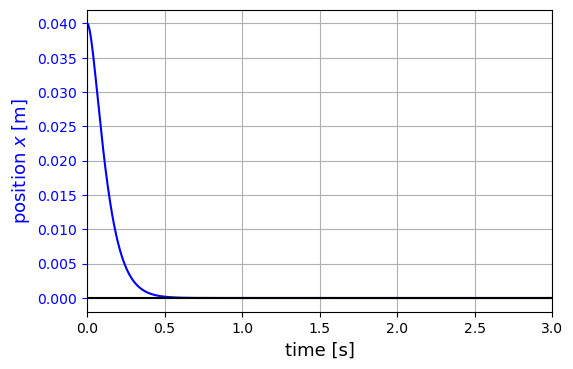

In [21]:
# let's plot
# I will use the same coefficients except for the damping
b_crit = 2*sqrt(k*m)  # [kg/s]; this makes sure that the discriminant is 0

# derived quantities
gamma_crit = b_crit/m  #  damping coefficient [1/s]
t = linspace(0., 3., 1024)
r_c = -0.5*gamma_crit
A = x0
B = v0 + 0.5*gamma_crit*x0

x_crit = (A + B*t)*exp(-0.5*gamma_crit*t)  # position [m]

ftsz = 13
fig = plt.figure(dpi=100)
ax1 = fig.gca()
ax1.plot(t, x_crit, 'b', label='$x(t)$')  # position x
ax1.set_xlabel('time [s]', fontsize=ftsz) 
ax1.set_ylabel(r'position $x$ [m]', color='b', fontsize=ftsz)
ax1.tick_params('y', colors='b')  # color for y-axis is blue

ax1.grid()
ax1.axhline(0., color='k')  # draw the zero-axis as horizontal line
ax1.set_xlim(0., 3.)
plt.show()

Back to the everyday application I promised.
Notice how the decay is faster than the previous, overdamped oscillator.
In fact, the critically-damped oscillator is the one that decays the fastest without oscillating.

Indeed, in the overdamped case, there are two exponentials.
And because $r_m < -\gamma/2$, $\eexp{r_m t}$ always decays more slowly than $\eexp{r_p t}$, and the slowest sets the pace (as is hopefully visible in the figure of the overdamped oscillator above). In other words, we need to compare the decay of the critically damped oscillator with the decay of $\eexp{r_m t}$.

For the critically damped oscillator, the slowest term to decay is $t\eexp{-\gamma t /2}$, because it decays slower than $\eexp{-\gamma t /2}$. But even the decay of $t\eexp{-\gamma t/2}$ is faster than an overdamped oscillator which decays as $\eexp{r_m t}$.

*More math, but the reason is that if $\beta_1 > \beta_2 >0$, even $t\eexp{-\beta_1 t}$ decays faster than $\eexp{-\beta_2 t}$. The general mathematical result is that if $\beta_1 > \beta_2 >0$, let $P_n$ a polynomial of order $n$. 
Then, $P_n(t)\eexp{-\beta_1 t}$ decays faster than $\eexp{-\beta_2 t}$, i.e., $$\forall n \in \mathbb N,\quad \lim_{t\to \infty} P_n(t)\eexp{(\beta_2 - \beta_1)t} = 0.$$I do not know at which point you will learn this calculus result, or if you already did, but it is true. Just accept this fact for this class.*

![More GoT wisdom](itisKnown.gif)

This property can be desirable, a famous example being a car suspension system, pictured in King's fig. 2.3 (reproduced here, fig. 5).

![Fig. 5: King 2.3: Suspension](Suspension.png)

If the spring was too stiff or the shock absorber too soft, shocks would turn into oscillations and passengers would bounce up and down.
On the other hand, if the spring was not very stiff or the shock absorber too hard to move, shocks would also be transmitted to the car: the car might fly a little, fall hard on the ground, and so on.
A car maker wants the shock to be smoothed (not too stiff a spring, not too soft an absorber), but also that the energy doesn't linger in the car for too long (stiff enough a spring, soft enough an absorber): it is looking for critical damping to be achieved for the mass of a car + standard load.

Other possible applications:

* needle on a meter (don't want to wait for too long for the meter to reach value, but don't want it to oscillate around the value either),
* shock absorber + spring for a door that is meant to close automatically (don't want the cold winter wind to gush in for too long, but don't want the door to slam against the frame either).

## Summary

I invite you to re-watch the YouTube video I showed towards the beginning of this chapter (pendulum whose oscillation is being damped by a magnet), in order to revisit what the three regimes mean.

I also invite you to play with the tool by following this link: 

https://faraday.physics.utoronto.ca/GeneralInterest/Harrison/Flash/ClassMechanics/DampedSHM/DampedSHM.html

Below (fig. 6) I plot the three cases that we have seen so far. Note that the values of all parameters but $b$ (or $\gamma$) are kept constant. 
$b$ (or $\gamma$) is the only parameter that we vary across all cases.

In [22]:
# let's plot
# I will use the same parmeters except for the damping
fig = plt.figure(dpi=100)
ax1 = fig.gca()
ax1.plot(t, x_crit, 'b', label='critical')  # plotting the position x
ax1.plot(t, x_over, 'r--', label='overdamped')  # plotting the position x
ax1.plot(t, x_under, 'g-.', label='underdamped')  # plotting the position x
ax1.set_xlabel('time [s]', fontsize=ftsz) 
ax1.set_ylabel('position $x$ [m]', color='b', fontsize=ftsz)
ax1.tick_params('y', colors='b')  # color for y-axis is blue

ax1.grid()
ax1.axhline(0., color='k')  # draw the zero-axis as horizontal line

plt.tight_layout()
ax1.set_xlim(0., 3.)

plt.legend()
plt.savefig('DampedOscillations.png')
plt.close()

![Fig. 6: Damped oscillations, a summary](DampedOscillations.png)

Note above how the transition from under- to overdamped happens, and how an overdamped oscillator takes too long to land.

1. $\gamma^2/4 < \omega_0^2$: light damping, or underdamped oscillator. Damped oscillations.

2. $\gamma^2/4 > \omega_0^2$: heavy damping, or overdamped oscillator. Exponential decay to equilibrium position.

3. $\gamma^2/4 = \omega_0^2$: critical damping. Quickest return to equilibrium position without overshoot.

# Energy

## General Considerations

Whether the mass moves or is held in place, the friction does not represent an energy reservoir like KE or PE do: it merely removes mechanical energy from the system.
Therefore, the energy of the system has the same expression:
$$ E = K + U = \frac12 m v^2 + \frac12 kx^2.$$

What the existence of friction/damping change is the *time evolution* of the mechanical energy: it decays.
Note that I am not violating the conservation of total energy of a closed system.
This is because damping allows to exchange energy with other types of energy reservoirs.
For example, friction can create heat. 
The energy is still present in the system, but it is in the form of *internal energy*, not mechanical energy.
The energy could also be exchanged with the outside, for example in the form of vibrations (mechanical vibrations or sound waves). But in any case, the *total energy of the closed system*, which may include the entire universe if need be, stays constant. On the other hand, the system we are considering in this lecture (mass+spring) is *not* closed.

In the SHO, $E$ was constant because without any damping, the SHO is effectively a closed system, a system that cannot exchange energy with other reservoirs of energy, be they internal or external.

The damping does not represent an energy reservoir, but is does represent a leak, or a drain, of energy:

$$ \ode{E}t = \ode{}{t}\left(\frac12 m v^2 +\frac12k x^2\right) = mv\dot v + kx\dot x = (ma + kx)v, $$
and because $ma = -kx - bv$, 
$$ \boxed{\ode{E}t =  -bv^2}. $$
The mechanical energy loss is directly attributable to the damping.
Notice how the damping rate depends on the *square* of the linear quantities, here, $v^2$.
This is a reminder of the quadratic dependence of energy quantities versus linear quantities ("double the amplitude, quadruple the energy").

## Underdamped Harmonic Oscillator ($\omega_0^2 > \gamma^2/4$)

The potential energy is
$$ U = \frac12 k x^2 =  \frac12 k A_0^2 \cos^2(\omega_d t + \phi) \eexp{-\gamma t}  $$

The kinetic energy is
\begin{align*}
    K & = \frac12 m A_0^2 \eexp{- \gamma t}\left[-\omega_d\sin(\omega_d t + \phi) - \frac{\gamma}{2}\cos(\omega_dt +\phi)\right]^2 \\
      & = \frac12 m A_0^2 \omega_d^2 \eexp{- \gamma t}\left[\sin(\omega_d t + \phi) + \frac{\gamma}{2\omega_d}\cos(\omega_dt +\phi)\right]^2 \\
      & \approx \frac12 m A_0^2 \omega_0^2 \eexp{- \gamma t}\sin^2(\omega_d t + \phi),
\end{align*}
where the last bit of approximation is valid when $\omega_0 \gg \gamma/2 \Rightarrow \gamma/(2\omega_d) \approx \gamma/(2\omega_0) \ll 1$.

The mechanical energy is therefore (under the $\gamma/(2\omega_0) \ll 1$, $\omega_d \approx \omega_0$ approximation):
$$ E = K + U \approx \frac12 A_0^2 \eexp{- \gamma t}\left[m\omega_0^2 \sin^2(\omega_d t + \phi) + k \cos^2(\omega_d t + \phi)\right], $$
$$\textrm{Recall that } m\omega_0^2 = k \textrm{ and } \cos^2 + \sin^2 = 1\quad \Rightarrow\quad \boxed{E = \frac12 k A_0^2 \eexp{- \gamma t}}.$$

The point to remember is that  **for a lightly damped oscillator, the mechanical energy decays exponentially.**
The e-folding decay time scale $1/\gamma$ is also called the *lifetime* of the oscillation.

*Remarks:*

* *We only ask you to remember this $\gamma/(2\omega_0) \ll 1$ limiting behaviour. Below, I plot the unapproximated version of $K$ and $E$ for your information, not because you have to remember it.*
* *Above, I made a few approximations in a row, which can be dangerous business if we are not careful. The proper way to do it would be to define $\varepsilon = \gamma/(2\omega_0)$, to Taylor-expand each term, and to collect all the leading-order terms. Such mathematical refinery is a bit too technical for what is required of you in this class.*

In [23]:
# let's plot, with the previous numerical values for the underdamped oscillator

K_under = 0.5*m*v_under**2
K_under_approx = 0.5*m*v_under_approx**2

U_under = 0.5*k*x_under**2

E_under = K_under + U_under
E_under_approx = K_under_approx + U_under

fig = plt.figure(dpi=100)
ax1 = fig.gca()
ax1.plot(t, K_under, 'b-.', label='$K(t)$')  # unapproximated kinetic energy
ax1.plot(t, K_under_approx, 'b', label='$K(t)$, approx.')  # approximated kinetic energy
ax1.plot(t, U_under, 'g--', label='$U(t)$')  # potential energy
ax1.plot(t, E_under, 'r-.', label='$E(t)$')  # unapproximated mechanical energy
ax1.plot(t, E_under_approx, 'r', label='$E(t)$, approx.')  # approximated mechanical energy
ax1.set_xlim([0., 3.])
ax1.set_xlabel('time [s]', fontsize=ftsz) 
ax1.set_ylabel('Energies [J]', fontsize=ftsz)

ax1.grid()
ax1.axhline(0., color='k')  # draw the zero-axis as horizontal line

plt.tight_layout()
ax1.set_xlim(0., 3.)

plt.legend()
plt.savefig('LightlyDampedEnergy.png')
plt.close()

![Fig. 7: Energy of lightly damped oscillations](LightlyDampedEnergy.png)

In [24]:
print('gamma/(2*omega0) = {0:.1e}'.format(0.5*b_under/m/sqrt(k/m)))
print('Q = {0:.1e}'.format(sqrt(k/m)/(b_under/m)))
print('1/gamma = {0:.1e} s'.format((b_under/m)**-1))

gamma/(2*omega0) = 4.2e-02
Q = 1.2e+01
1/gamma = 8.0e-01 s


As you can see above (fig. 7), it is hard to distinguish the curves with or without the $\gamma/(2\omega) \ll 1$ approximation, meaning that even for an e-folding decay scale of a few pseudo-oscillation periods (here, $\gamma/(2\omega) \approx 0.042$), the approximation is a good one.

## Over- and Critically damped oscillators

There isn't much to say about these cases: their energy just decays, and because of the quadratic dependence of the energy on the amplitude, they decay twice as fast as the envelope of the oscillations.

I will just plot all three cases in one plot.

In [25]:
# let's plot, with the previous numerical values fir the underdamped oscillator
# Energies for the critical case
v_crit = (B - 0.5*gamma_crit*A - 0.5*gamma_crit*B*t)*exp(-0.5*gamma_crit*t)
# above: velocity in critical case
K_crit = 0.5*m*v_crit**2  # kinetic
U_crit = 0.5*k*x_crit**2  # potential
E_crit = K_crit + U_crit  # mechanical

# Energies for the overdamped case
K_over = 0.5*m*v_over**2  # kinetic
U_over = 0.5*k*x_over**2  # potential
E_over = K_over + U_over  # mechanical

# plot
fig = plt.figure(dpi=100)
ax1 = fig.gca()
ax1.plot(t, E_under_approx, 'g-.', label='underdamped, approx.')
ax1.plot(t, E_over, 'r--', label='overdamped')
ax1.plot(t, E_crit, 'b', label='critical')
ax1.set_xlabel('time [s]', fontsize=ftsz) 
ax1.set_ylabel('Energies [J]', fontsize=ftsz)

ax1.grid()
ax1.axhline(0., color='k')  # draw the zero-axis as horizontal line
ax1.set_xlim(0., 3.)

plt.tight_layout()

plt.legend()
plt.savefig('DampedEnergy.png')
plt.close()

![Fig. 8: Energy of damped oscillations](DampedEnergy.png)

The critical case is the one for which the energy decays the fastest on figure 8, and in all cases (all other things being equal) as well.
In some engineering problems like the ones I was mentioning before, removing energy as fast as possible is a desirable quality.

# Quality factor ('$Q$-value') of an oscillator

## Definition

In many other engineering cases, we want a system to require as little driving as possible, for energy saving purposes for example.
If that is indeed what one wants, the damping has to be as weak as possible.
In this case, the *quality* of the system will therefore be measured by the ratio
$$ Q = \frac{\textrm{tendency to oscillate}}{\textrm{tendency to damp}}. $$
Now, there is no fool-proof definition of what these "tendencies" are.
But in the lightly damped oscillator (the only one, the $Q$-factor applies to), oscillations last longer when $\gamma \ll 2\omega_0$.
Therefore, a high "quality" (as defined by those for whom this is a quality...) is achieved when
$$ \boxed{Q = \frac{\omega_0}\gamma}. $$

With this definition, the pseudo-angular frequency can be written $$\omega_d^2 = \omega_0^2\left(1 - \frac1{4Q^2}\right).$$

$Q$ is called the *quality factor*, $Q$*-factor* or $Q$*-value* of the oscillator.
In the case I used throughout this set of notes, $Q \approx 12$.

It can be thought of as a measure of the number of oscillations (in radians) an oscillator can achieve within one lifetime.
Indeed, define $\tau = 1/\gamma$ as the lifetime, and $n = \tau/T_0$ the number of natural cycles achieved in one lifetime; then $\boxed{Q = 2\pi n}$.

You can verify it on the figures of lightly damped oscillations in this chapter: we have $\gamma^{-1} = \tau \approx 0.8$ s, during which you see the oscillator perform almost two full cycles.
$2\pi \approx 6$, 2 cycles $\times$ 2$\pi \approx 12\approx Q$.

It works because $Q$ is high enough to say that $T_0 \approx T_d$.
For most practical matters, this is the case.

Fig. 2.7 of King (reproduced here, fig. 9) shows a few examples of oscillators with different $b$ parameters, and their corresponding $Q$ values.

![Fig. 9: (King 2.7) Q-values](Q-valuz.png)

## Energetic interpretation

The quality factor also has an interpretation of how vigorously the damping removes mechanical energy from the system.
Indeed, let $E_n = E_0\exp(-\gamma t)$ be the mechanical energy in the system at a given time $t$.
One pseudo-period later, the mechanical energy will be $E_{n+1} = E_0\exp(-\gamma(t+T_d))$.

The mechanical energy lost in the system during a pseudo-period, relative to how much energy there was at the beginning of the pseudo-period, is therefore equal to
$$ \frac{E_{n} - E_{n+1}}{E_n} = \frac{\exp(-\gamma t) - \exp(-\gamma(t+T_d))}{\exp(-\gamma t)} = 1 - \exp(-\gamma T_d).$$

Recall that if $\varepsilon \ll 1$, then $\exp(\varepsilon) = 1 + \varepsilon + O(\varepsilon^2) \approx 1 + \varepsilon$ (Taylor expansion).
Therefore, for a very lightly damped oscillator ($\gamma \ll \omega_0$, $Q \gg 1$), 
$$ \frac{E_{n} - E_{n+1}}{E_n} \approx \gamma T_d \approx \frac{2\pi}{Q}.$$

This was the relative energy loss *during one (pseudo-)cycle*.
The relative energy loss *during one (pseudo-)radian* is therefore $1/Q$.
In other words, a possible interpretation of $Q$ is
$$ Q  = \frac{\textrm{energy stored in the oscillator}}{\textrm{energy dissipated one radian later}}. $$

## Some values

Taken from King's Table 2.1.

| Oscillatory system | Typical value of Q |
| :-: | :-: |
| Paper weight suspended on a rubber band | 10 |
| Clock pendulum | 75 |
| Electrical LRC circuit | 200 |
| Plucked violin string | 1,000 |
| Microwave cavity oscillator | 10,000 |
| Quartz crystal | 1,000,000 |

# Damped Electrical Oscillations: the LRC circuit

See Fig. 2.8 of King attached (fig. 10): we add a resistor (resistance $R$) in series to the circuit we saw in the first chapter, which adds damping to the system.

![Fig. 10 (King 2.8) The LRC circuit](LRC.png)

Like in the chapter on SHOs, we will draw an analogy between the spring+mass system and the LRC circuit by simply deriving the equation for the DHO, and the rest will follow.

Recall that the equivalent of Newton's second law to derive the equation for an electric circuit is Kirchhoff's law, i.e., all voltages sum up to zero.
Here are the voltages of each component at any instant:

* capacitor: $V_C = q/C$,
* inductor: $V_L = L\dot I = L\ddot q$, and
* resistor: $V_R = RI = R\dot q$.

Therefore, because the equivalent of $\dot x$ is $\dot q$ here, the equivalent of $b$ is now $R$.

Kirchhoff's law is now
$$ L\ddot q + R\dot q + q/C = 0 \quad \Rightarrow \quad \ddot q + \gamma\dot q + \omega_0^2 q = 0, $$
after division by $L$ and with $\gamma = R/L$ and $\omega_0^2 = 1/LC$.

We can now complete the table, which I started in Chapter 1 on SHOs:

| Mass + spring + damping | LRC circuit |
| :---------------------: | :---------------------: |
| $x$                 | $q$         |
| $v$                 | $I$         |
| $m$                 | $L$         |
| $k$                 | $1/C$       |
| $\omega_0^2=k/m$    | $\omega_0^2=1/(LC)$ |
| KE $K=mv^2/2$       | Magnetic energy $LI^2/2$ |
| PE $U=kA^2/2$       | Electrostatic energy $CV_C^2/2$ |
| $b$                 | $R$         |
| $\gamma=b/m$        | $\gamma=R/L$ |
| $\omega_d^2=\frac1m\left(k-\frac{b^2}{4m}\right)$ | $\omega_d^2=\frac1L\left(\frac1C-\frac{R^2}{4L}\right)$ |
| $Q=\frac{\sqrt{km}}b$ | $Q=\frac1R\sqrt{\frac{L}{C}}$ |

Equations are generic, the physics is in the parameters.